In [4]:
import os
from copy import deepcopy
import cv2
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

from keras.layers import Input, Dense, ZeroPadding2D
from keras.models import Model

if os.path.basename(os.getcwd()) != 'PConv2Layer':
    os.chdir('..')
    
from utils.pconv_layer import PConv2D
from utils.util import MaskGenerator

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
# loading a sample image
img = cv2.imread('../Desktop/Repository/Projects/PConv2DKeras/data/sample_image.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

shape = img.shape
print(f"Shape of image is: {shape}")

Shape of image is: (639, 960, 3)


In [38]:
# mask generator
mask_generator = MaskGenerator(shape[0], shape[1], 3, rand_seed=42)
mask = mask_generator.sample()

masked_img = deepcopy(img)
masked_img[mask==0] = 255

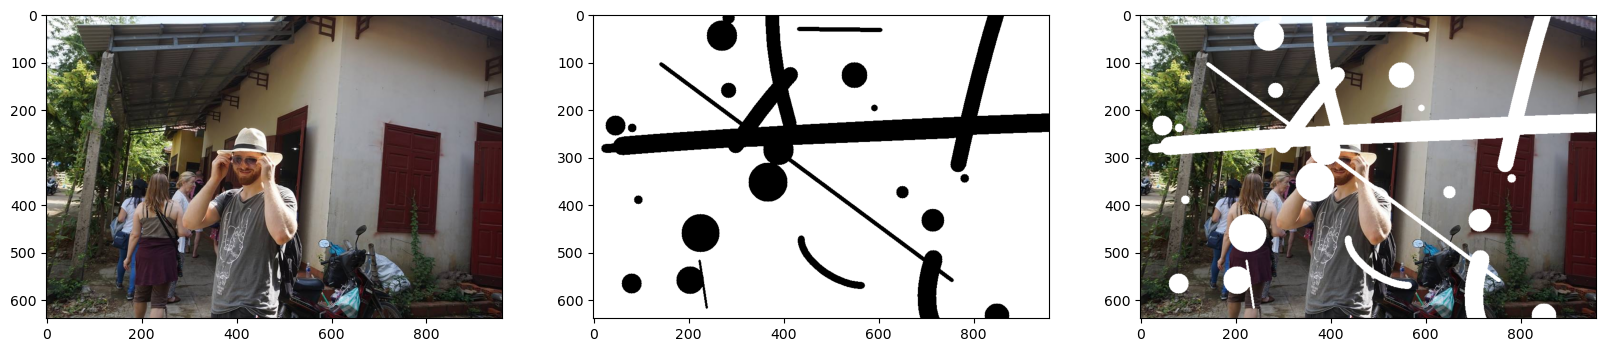

In [39]:
# Show the images side by side
_, axes = plt.subplots(1, 3, figsize=(20, 5))
axes[0].imshow(img)
axes[1].imshow(mask*255)
axes[2].imshow(masked_img)
plt.show()

In [41]:
# implementing the model
from utils.pconv_layer import PConv2D

In [47]:
# input images and masks
input_img = Input(shape=(shape[0], shape[1], shape[2],))
input_mask = Input(shape=(shape[0], shape[1], shape[2],))

output_img, output_mask1 = PConv2D(8, kernel_size=(7,7), strides=(2,2))([input_img, input_mask])
output_img, output_mask2 = PConv2D(16, kernel_size=(5,5), strides=(2,2))([output_img, output_mask1])
output_img, output_mask3 = PConv2D(32, kernel_size=(5,5), strides=(2,2))([output_img, output_mask2])
output_img, output_mask4 = PConv2D(64, kernel_size=(3,3), strides=(2,2))([output_img, output_mask3])
output_img, output_mask5 = PConv2D(64, kernel_size=(3,3), strides=(2,2))([output_img, output_mask4])
output_img, output_mask6 = PConv2D(64, kernel_size=(3,3), strides=(2,2))([output_img, output_mask5])
output_img, output_mask7 = PConv2D(64, kernel_size=(3,3), strides=(2,2))([output_img, output_mask6])
output_img, output_mask8 = PConv2D(64, kernel_size=(3,3), strides=(2,2))([output_img, output_mask7])

In [49]:
model = Model(
    inputs = [input_img, input_mask],
    outputs = [
        output_img, 
        output_mask1,
        output_mask2,
        output_mask3,
        output_mask4,
        output_mask5,
        output_mask6,
        output_mask7,
        output_mask8
    ]
)

In [50]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 639, 960, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_11 (InputLayer)          [(None, 639, 960, 3  0           []                               
                                )]                                                                
                                                                                                  
 p_conv2d_3 (PConv2D)           [(None, 320, 480, 8  2360        ['input_10[0][0]',               
                                ),                                'input_11[0][0]']           

In [56]:
# checking mask layer updates
formatted_img = np.expand_dims(masked_img, 0) / 255
formatted_mask = np.expand_dims(mask, 0) / 255
print(f"original mask shape: {formatted_mask.shape} - Mask value in mask: {np.max(formatted_mask)}")

output_img, o1, o2, o3, o4, o5, o6, o7, o8 = model.predict([formatted_img, formatted_mask])

original mask shape: (1, 639, 960, 3) - Mask value in mask: 0.00392156862745098


2023-04-03 14:47:11.311216: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-04-03 14:47:11.418911: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step


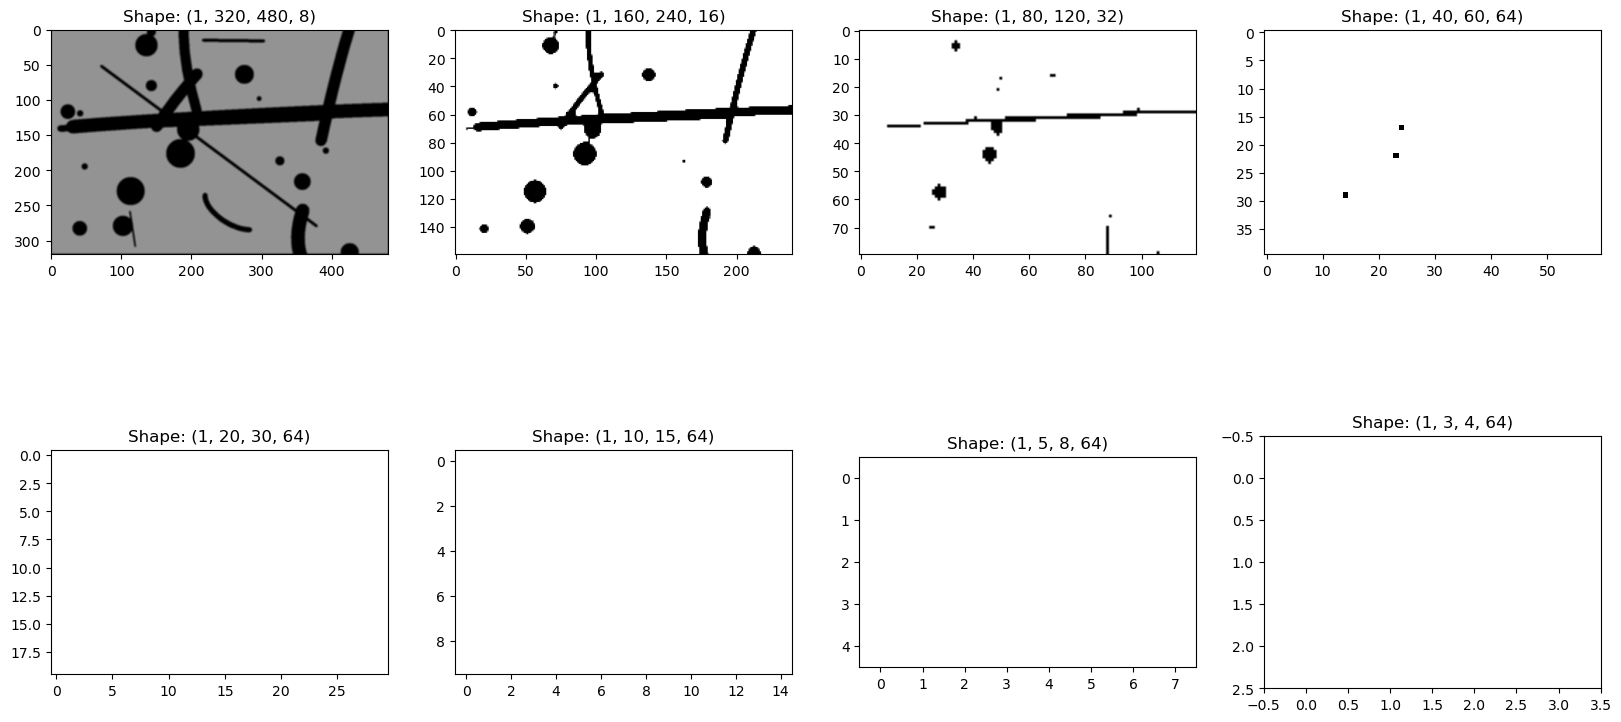

In [58]:
_, axes = plt.subplots(2, 4, figsize=(20, 10))
axes[0][0].imshow(o1[0, :,:, 0], cmap = 'gray', vmin=0, vmax=1)
axes[0][1].imshow(o2[0, :,:, 0], cmap = 'gray', vmin=0, vmax=1)
axes[0][2].imshow(o3[0, :,:, 0], cmap = 'gray', vmin=0, vmax=1)
axes[0][3].imshow(o4[0, :,:, 0], cmap = 'gray', vmin=0, vmax=1)
axes[1][0].imshow(o5[0, :,:, 0], cmap = 'gray', vmin=0, vmax=1)
axes[1][1].imshow(o6[0, :,:, 0], cmap = 'gray', vmin=0, vmax=1)
axes[1][2].imshow(o7[0, :,:, 0], cmap = 'gray', vmin=0, vmax=1)
axes[1][3].imshow(o8[0, :,:, 0], cmap = 'gray', vmin=0, vmax=1)
axes[0][0].set_title(f"Shape: {o1.shape}")
axes[0][1].set_title(f"Shape: {o2.shape}")
axes[0][2].set_title(f"Shape: {o3.shape}")
axes[0][3].set_title(f"Shape: {o4.shape}")
axes[1][0].set_title(f"Shape: {o5.shape}")
axes[1][1].set_title(f"Shape: {o6.shape}")
axes[1][2].set_title(f"Shape: {o7.shape}")
axes[1][3].set_title(f"Shape: {o8.shape}")
plt.show()
